We assume that $1-\beta\leq 0.00126\tfrac{\log d}{\sqrt{d}}$

In [1]:
assump=CBF((1-(0.00126*log(400000))/sqrt(400000)))
assump2=CBF(assump^2)
denom_b=CBF((3-assump)*(4-assump))

print('beta >',assump)
print('beta^2 >', assump2)
print('(3-beta)(4-beta)<',denom_b)

beta > [0.999974301723745 +/- 5.74e-16]
beta^2 > [0.999948604107892 +/- 6.58e-16]
(3-beta)(4-beta)< [6.00012849204167 +/- 4.76e-15]


In [2]:
c1=CBF((2-assump)^2)
c2=CBF((3-assump)^2)

print(c1,'and',c2)

[1.000051397212910 +/- 8.09e-16] and [4.00010279376542 +/- 2.56e-15]


In [3]:
#We take the center of the complex ball on the square of the lower bound of \beta
c=assump2.mid()
c11=c1.mid()
c22=c2.mid()

#J1 using complex ball fields
J1=CBF(integral(abs(x*zeta(1-I*x))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,-3,3)/(2*pi))
J1

[0.1968597028606857 +/- 9.07e-17]

In [4]:
#J2 using complex ball fields

J2=CBF(integral(abs(x*zeta(1-I*x)*log(e*(abs(x)+14/5)))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,-3,3)/(2*pi))
J2

[0.451899804706626 +/- 5.51e-16]

In [5]:
#J3 using complex ball fields

J3=CBF(integral(x*log(x)/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J3

[0.208817491218100 +/- 2.41e-16]

In [6]:
#J4 using complex ball fields

J4=CBF(integral((x*log(x)*log(e*(x+14/5)))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J4

[0.818128728674733 +/- 6.75e-16]

In [7]:
#The coefficients in (1.4.13)
J1J3=J1+J3
J2J4=J2+J4
print('J1+J3 is equal to',J1J3)
print('J2+J4 is equal to',J2J4)

J1+J3 is equal to [0.405677194078786 +/- 6.03e-16]
J2+J4 is equal to [1.270028533381359 +/- 9.31e-16]


In [8]:
#The constant terms in the upper bound of J
upperJ=CBF((J1J3+(J2J4/log(400000)))/(2*pi)); upperJ

[0.080235572932132 +/- 4.54e-16]

In [9]:
upperJ2=CBF(2*upperJ); upperJ2

[0.160471145864265 +/- 5.13e-16]

In [11]:
t1=CBF(1/(2*denom_b))
t2=CBF(log(4)/(2*denom_b))
t3=CBF(0.00126)*upperJ2

print(t1, t2, t3)

[0.0833315487598607 +/- 6.82e-17] [0.115522056149182 +/- 1.33e-16] [0.000202193643788973 +/- 7.91e-19]


In [18]:
print(t1/deno, t2/deno, t3/deno)

[0.0037797563132278 +/- 1.11e-17] [0.0052398548634350 +/- 1.95e-17] [9.1711088174810e-6 +/- 4.35e-20]


In [19]:
# f(d)=20
CBF(t3/(deno*20))

[4.5855544087405e-7 +/- 2.16e-21]

In [78]:
CBF(upperJ2/deno)

[0.0072786577916516 +/- 4.44e-17]

In [77]:
CBF(0.00126)*upperJ2/deno

[9.1711088174810e-6 +/- 4.35e-20]

#### Upper estimate of the integral $I$

In [13]:
nu=CBF(1/log((1+sqrt(5))/2)); nu

[2.07808692123503 +/- 3.44e-15]

In [14]:
s0=CBF(nu*log(400000)/2); s0

[13.4028500073667 +/- 3.83e-14]

In [15]:
deno=CBF((pi^2*s0)/6); deno

[22.0468045699745 +/- 6.12e-14]

#### Case 1

In [83]:
def case1_pos(t):
    return N(0.00377-0.00523/t-0.000009*t)

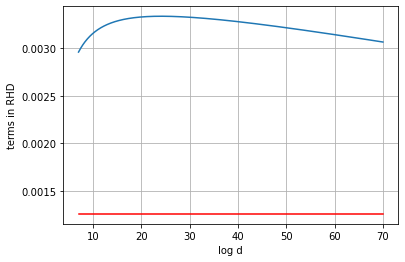

In [84]:
#from ipywidgets import *
import numpy as np 
import matplotlib.pyplot as plt

Num=1000
x=np.linspace(7,70,num=Num)
y=[]
for t in x:
    z=case1_pos(t)
    y.append(z)
w=0.00126*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

#### Case 2

In [86]:
def Sigma(l):
    return CBF(2*sum([1./k for k in [1..l] if is_prime_power(k)]))

In [87]:
CBF(Sigma(20))

[4.008177726985776 +/- 3.46e-16]

In [270]:
CBF(e*Sigma(20))

[10.89535668049971 +/- 8.43e-15]

In [88]:
def Err0(l):
    return CBF(3.6/log(l)^2)

In [89]:
CBF(1+2*log(2))+Err0(20)

[2.78743485458513 +/- 4.57e-15]

In [90]:
CBF(1/(s0*sqrt(2*pi)))

[0.0297654812358684 +/- 8.61e-17]

In [92]:
CBF(log(4)/(2*denom_b*deno))

[0.0052398548634350 +/- 2.16e-17]

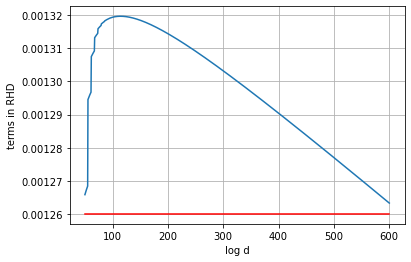

In [85]:
import numpy as np
import matplotlib.pyplot as plt

#f(d)=20

def poscase2(t):
    k=ceil((t-log(4))/(2*log(20)))
    D2=0.02976*(1+k)/(1+k-4.00817)*(10.89535/k)^k/sqrt(k)
    return N((0.00377-(0.00523/t)-0.0000004*t)/(2.78743+D2))

Num=1000
x=np.linspace(50,600,num=Num)
y=[]
for t in x:
    z=poscase2(t)
    y.append(z)
w=0.00126*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

#### Case 3

In [93]:
z=CBF(.1*(600-log(4))); z

[59.86137056388801 +/- 8.02e-15]

In [94]:
Sigma(59)

[4.749539810999852 +/- 3.26e-16]

In [95]:
CBF((5*z)/log(z))

[73.1438309448085 +/- 8.27e-14]

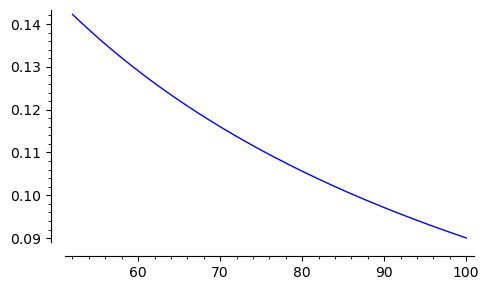

In [40]:
var('t')
plot((e*log(t)*(log(log(t))+2.0695))/(5*t), (t, 52, 100), figsize=[5,3])

In [96]:
esk=CBF((e*log(z)*(log(log(z))+CBF(2.0695)))/(5*z)); esk

[0.129274828572209 +/- 4.03e-16]

In [98]:
k_s=CBF(1/(1-(esk/e))); k_s

[1.049932205118742 +/- 5.30e-16]

In [100]:
T=CBF(1/s0)*CBF(k_s*(1/sqrt(2*pi*74))*esk^74); T

[6.49070880545e-69 +/- 1.11e-81]

In [111]:
d=CBF(1)+CBF(2*log(2))+CBF(3.6)/(log(z))^2; d

[2.601287492839607 +/- 9.03e-16]

In [80]:
n((0.00377-0.000008-0.00009)/2.60128)

0.00141161274449502

In [103]:
tt2=CBF(t2/(10*z+log(4))); tt2

[0.000192536760248637 +/- 5.33e-19]

In [79]:
n(0.000009*((10*ass.mid()+log(4))/ass.mid()))

0.0000902084257198349

In [107]:
ratio=CBF(0.00126)*upperJ2/deno; ratio

[9.1711088174810e-6 +/- 4.35e-20]

In [109]:
tt3=CBF(ratio*(10*z+log(4))/z); tt3

[9.1923476503362e-5 +/- 6.62e-19]

In [114]:
CBF((t1/deno-tt2-tt3)/d)

[0.00134367926886093 +/- 7.23e-18]